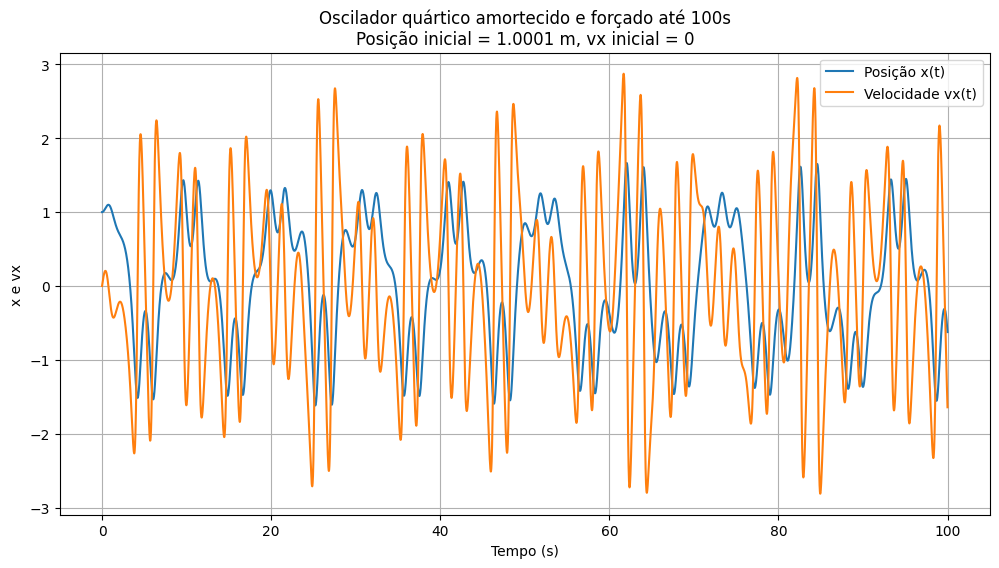

In [4]:
import numpy as np
import matplotlib.pyplot as plt


k = 0.2
alpha = 1.0
b = 0.01
F0 = 5.0
omega_f = 0.6

def acelera(t, x, vx):
    return -k*x - 4*alpha*x**3 - b*vx + F0*np.cos(omega_f*t)

def rk4_x_vx(t, x, vx, acelera, dt):
    ax1 = acelera(t, x, vx)
    c1v = ax1 * dt
    c1x = vx * dt

    ax2 = acelera(t + dt/2., x + c1x/2., vx + c1v/2.)
    c2v = ax2 * dt
    c2x = (vx + c1v/2.) * dt

    ax3 = acelera(t + dt/2., x + c2x/2., vx + c2v/2.)
    c3v = ax3 * dt
    c3x = (vx + c2v/2.) * dt

    ax4 = acelera(t + dt, x + c3x, vx + c3v)
    c4v = ax4 * dt
    c4x = (vx + c3v) * dt

    xp = x + (c1x + 2*c2x + 2*c3x + c4x) / 6.
    vxp = vx + (c1v + 2*c2v + 2*c3v + c4v) / 6.
    return xp, vxp

x = 1.0000
vx = 0.0
t = 0.0
dt = 0.01
tf = 100.0
n_steps = int(tf / dt)

t_arr = np.zeros(n_steps + 1)
x_arr = np.zeros(n_steps + 1)
vx_arr = np.zeros(n_steps + 1)

t_arr[0] = t
x_arr[0] = x
vx_arr[0] = vx

for i in range(1, n_steps + 1):
    x, vx = rk4_x_vx(t, x, vx, acelera, dt)
    t += dt
    t_arr[i] = t
    x_arr[i] = x
    vx_arr[i] = vx

plt.figure(figsize=(12,6))
plt.plot(t_arr, x_arr, label='Posição x(t)')
plt.xlabel('Tempo (s)')
plt.ylabel('x e vx')
plt.title('Oscilador quártico amortecido e forçado até 100s\nPosição inicial = 1.0001 m, vx inicial = 0')
plt.legend()
plt.grid(True)
plt.show()